In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv('house-prices.csv')
df.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [3]:
df = df.drop(['Neighborhood'],axis=1)

In [4]:
# Replace "No" with 0 and "Yes" with 1 in the "Brick" column
df['Brick'] = df['Brick'].replace({'No': 0, 'Yes': 1})
df.tail()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick
123,124,119700,1900,3,3,3,1
124,125,147900,2160,4,3,3,1
125,126,113500,2070,2,2,2,0
126,127,149900,2020,3,3,1,0
127,128,124600,2250,3,3,4,0


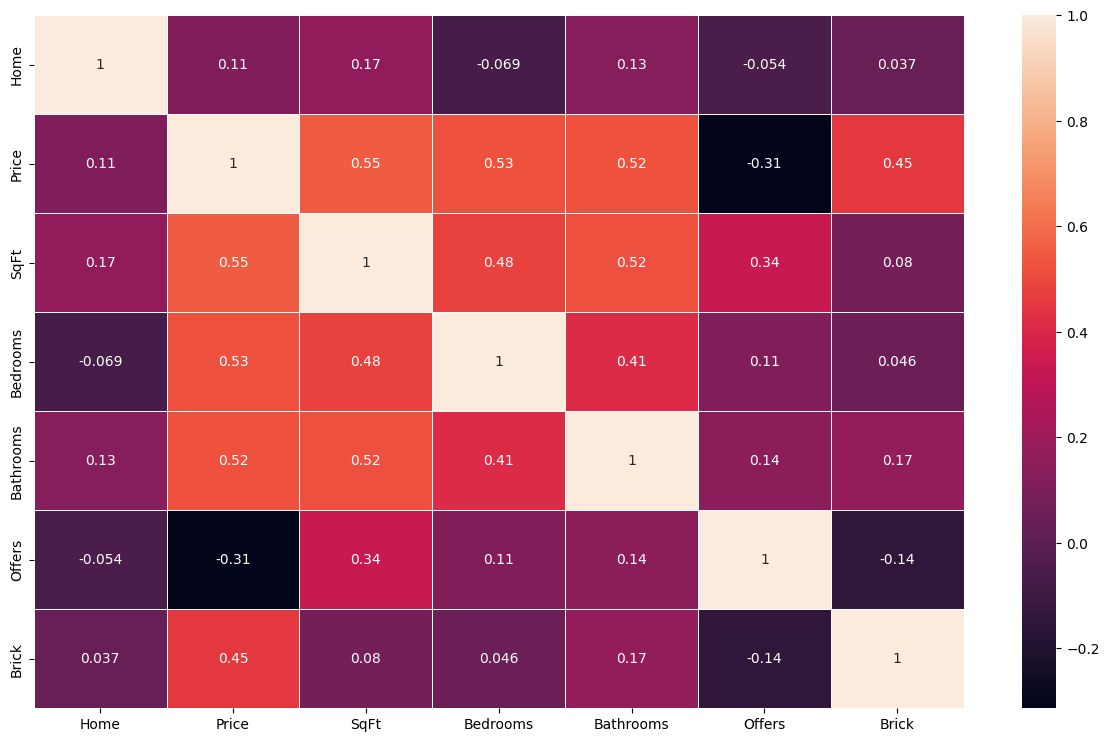

In [5]:
# Pearson correlation
plt.subplots(figsize=(15, 9))
cor = df.corr()
sns.heatmap(cor, annot=True, linewidths=.5)
plt.show()

In [6]:
df = df.drop(['Home','Bedrooms','Bathrooms','Offers'], axis=1)
df.tail()

,Price,SqFt,Brick
123,119700,1900,1
124,147900,2160,1
125,113500,2070,0
126,149900,2020,0
127,124600,2250,0


In [7]:
X = df.iloc[:,0:2].values
X

array([[114300,   1790],
       [114200,   2030],
       [114800,   1740],
       [ 94700,   1980],
       [119800,   2130],
       [114600,   1780],
       [151600,   1830],
       [150700,   2160],
       [119200,   2110],
       [104000,   1730],
       [132500,   2030],
       [123000,   1870],
       [102600,   1910],
       [126300,   2150],
       [176800,   2590],
       [145800,   1780],
       [147100,   2190],
       [ 83600,   1990],
       [111400,   1700],
       [167200,   1920],
       [116200,   1790],
       [113800,   2000],
       [ 91700,   1690],
       [106100,   1820],
       [156400,   2210],
       [149300,   2290],
       [137000,   2000],
       [ 99300,   1700],
       [ 69100,   1600],
       [188000,   2040],
       [182000,   2250],
       [112300,   1930],
       [135000,   2250],
       [139600,   2280],
       [117800,   2000],
       [117100,   2080],
       [117500,   1880],
       [147000,   2420],
       [131300,   1720],
       [108200,   1740],


In [8]:
y = df.iloc[:,-1].values
y

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0], dtype=int64)

Cost after iteration 0: 0.6930710429675333
Cost after iteration 10000: 0.519627301519427
Cost after iteration 20000: 0.5044491625891346
Cost after iteration 30000: 0.5008965229329401
Cost after iteration 40000: 0.4998987085481292


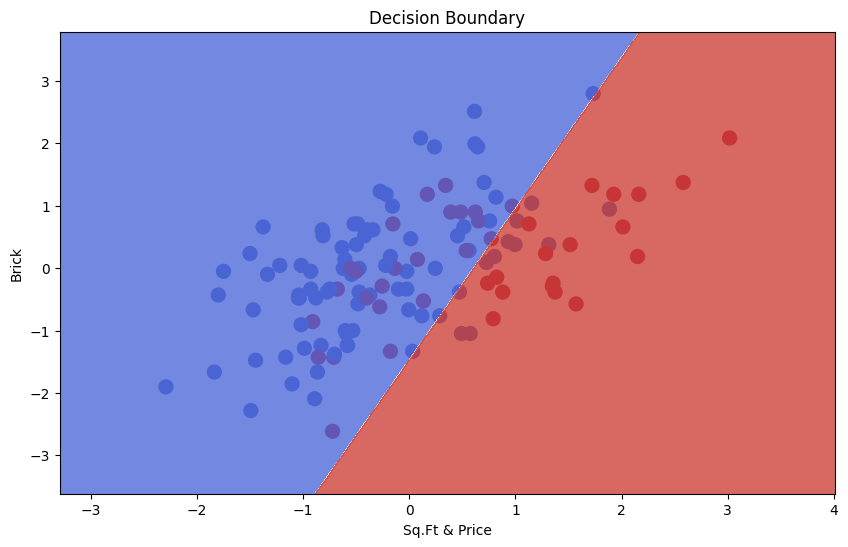

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=100000, print_cost=False):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.print_cost = print_cost
        self.theta = None
        self.cost_history = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def cost_function(self, X, y, theta):
        m = len(y)
        h = self.sigmoid(np.dot(X, theta))
        cost = (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
        return cost

    def gradient_descent(self, X, y, theta):
        m = len(y)
        for i in range(self.num_iterations):
            h = self.sigmoid(np.dot(X, theta))
            gradient = np.dot(X.T, (h - y)) / m
            theta -= self.learning_rate * gradient
            cost = self.cost_function(X, y, theta)
            self.cost_history.append(cost)
            if self.print_cost and i % 10000 == 0:
                print(f"Cost after iteration {i}: {cost}")
        self.theta = theta

    def fit(self, X, y):
        X = np.insert(X, 0, 1, axis=1)  # Adding intercept term to feature matrix X.
        # X matrix, 0 index, 1 value.
        n_features = X.shape[1] # number of features present in the dataset X.
        self.theta = np.zeros(n_features) # Initialize the parameter vector θ with zeroes.
        self.gradient_descent(X, y, self.theta) # Call the gradient descent method.

    def predict(self, X):
        X = np.insert(X, 0, 1, axis=1)  # Adding intercept term
        predicted_probabilities = self.sigmoid(np.dot(X, self.theta))
        return (predicted_probabilities >= 0.5).astype(int)

    def plot_decision_boundary(self, X, y):
        plt.figure(figsize=(10, 6))
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=100)
        x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                               np.arange(x2_min, x2_max, 0.01))
        grid = np.c_[xx1.ravel(), xx2.ravel()]
        probs = self.predict(grid).reshape(xx1.shape)
        plt.contourf(xx1, xx2, probs, alpha=0.8, cmap=plt.cm.coolwarm)
        plt.xlabel('Sq.Ft & Price')
        plt.ylabel('Brick')
        plt.title('Decision Boundary')
        plt.show()


# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize and fit the model
model = LogisticRegression(learning_rate=0.001, num_iterations=50000, print_cost=True)
model.fit(X_scaled, y)

# Plot decision boundary
model.plot_decision_boundary(X_scaled, y)


Cost after iteration 0: 0.6930710429675333
Cost after iteration 10000: 0.519627301519427
Cost after iteration 20000: 0.5044491625891346
Cost after iteration 30000: 0.5008965229329401
Cost after iteration 40000: 0.4998987085481292


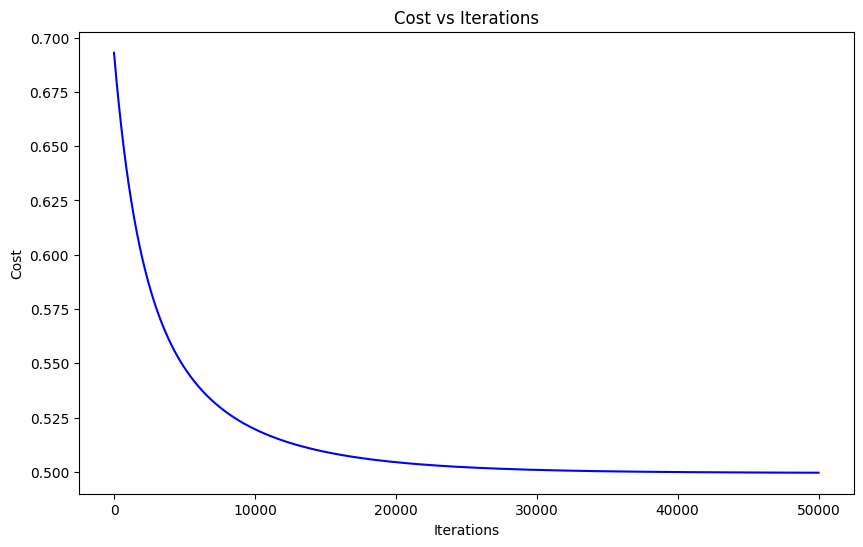

In [16]:
# Initialize and fit the model
model = LogisticRegression(learning_rate=0.001, num_iterations=50000, print_cost=True)
model.fit(X_scaled, y)


# Plot cost versus iterations curve
plt.figure(figsize=(10, 6))
plt.plot(range(len(model.cost_history)), model.cost_history, color='blue')
plt.title('Cost vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()
